## Neural Network

#### By Liliana O'Sullivan and Theodora Tataru

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
train_images[0,23,23]

194

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

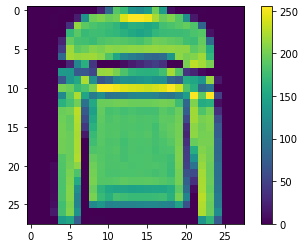

In [5]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

## Processing

Converting greyscale pixels (0-255) to be between 0-1, makes processing easier 

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [7]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

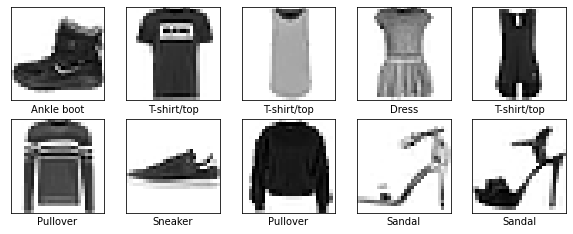

In [8]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=10) 

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4914 - accuracy: 0.8276
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3764 - accuracy: 0.8648
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3397 - accuracy: 0.8758
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3128 - accuracy: 0.8843
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2953 - accuracy: 0.8910
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2834 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2672 - accuracy: 0.9015
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2581 - accuracy: 0.9045
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2493 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.240

## Evaluating the Model

In [11]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.8797
Test accuracy: 0.8797000050544739


## Predictions

In [12]:
predictions = model.predict(test_images)

In [13]:
type(predictions)
print(predictions)

[[3.78682259e-08 9.73237846e-09 4.80240570e-10 ... 1.14163209e-03
  8.82744011e-09 9.98852253e-01]
 [1.05468949e-04 2.96280743e-16 9.98808622e-01 ... 1.23556663e-17
  5.17254121e-11 1.06100886e-17]
 [1.82012783e-09 1.00000000e+00 9.29401480e-14 ... 4.81096491e-27
  7.64604786e-12 2.93711318e-22]
 ...
 [4.46775521e-05 8.19199264e-10 4.79492955e-05 ... 3.93527960e-10
  9.98629093e-01 1.56567294e-12]
 [1.56460533e-09 9.99960542e-01 1.99422388e-11 ... 5.65956795e-15
  3.11569881e-09 1.25635292e-11]
 [3.00831767e-03 7.97722805e-07 1.75071676e-04 ... 1.29209487e-02
  6.41522277e-03 1.14478871e-05]]


In [14]:
np.argmax(predictions[0])

9

In [15]:
 test_labels[0]

9

Pick a number inclusive 1-1000: 100
Expected: Dress
Guess: Dress


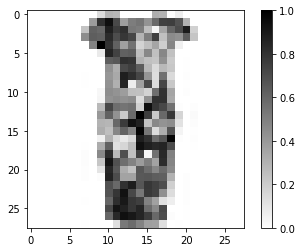

In [21]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    prediction = model.predict(np.array([image]))
    predicted_class = class_names[np.argmax(prediction)]
    show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
    plt.figure()
    plt.imshow(img, cmap=plt.cm.binary)
    print("Expected: " + label)
    print("Guess: " + guess)
    plt.colorbar()
    plt.grid(False)
    plt.show()

num = int(input("Pick a number inclusive 1-1000: "))
image = test_images[num]
label = test_labels[num]
predict(model, image, label)


NameError: name 'plot_image' is not defined

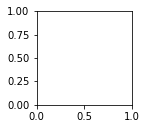